<h1>Iris Flowers Classifier</h1>

<h2>Import dependencies:</h2>

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [132]:
import warnings
warnings.filterwarnings('ignore')

<h2>Load the Data:</h2>

In [133]:
iris = datasets.load_iris()

In [134]:
data = pd.DataFrame(iris['data'],columns = iris['feature_names'])
data['Species'] = iris['target']
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [135]:
""" data = pd.read_csv("./Iris.csv", index_col=False)
data.head() """

' data = pd.read_csv("./Iris.csv", index_col=False)\ndata.head() '

In [136]:
data.shape

(150, 5)

<h2>Data Preprocessing:</h2>

<h3>Encode the Categorical data:</h3>

In [137]:
mapping ={'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [138]:
data["Species"].replace(mapping, inplace = True)
data["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

<h2>Split the Data:</h2>

In [139]:
X = data.drop(["Species"], axis=1)
Y = data["Species"]

<h3>Split The Data into train, validation and test sets using the built-in function train_test_split:</h3>

In [140]:
from sklearn.model_selection import train_test_split

# train data = 60%, validation data = 20% and, test data = 20%

X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X, Y, test_size=0.2, random_state=1)

# 25% of the train data (now 80% of the data) is 20% of the whole data
# 0.2 = val*0.8 so the val size = 0.25
X_Train2, X_Val2, Y_Train2, Y_Val2 = train_test_split(X_Train2, Y_Train2, test_size=0.25, random_state=1)

<h3 style="color: red">TODO:</h3>
<h3>Implement the Function train_validate_test_split(data, labels, testRatio = 0.3, valRatio = 0.3) from scratch</h3>

In [141]:
def train_validate_test_split(data, testRatio = 0.3, valRatio = 0.3):
    #shuffle the data to make sure the data order doesn't affect the training.
    data_shuffeled = data.sample(frac = 1)
    X_shuffeled = data_shuffeled.drop(["Species"], axis=1)
    Y_shuffeled = data_shuffeled["Species"]

    # the number of rows in the dataframe
    rows = data.shape[0]

    # Assign the train split
    # determine the size of the train data
    tain_row_num = int(rows*(1-(testRatio + valRatio)))
    X_Train = X_shuffeled.iloc[: tain_row_num]
    Y_Train = Y_shuffeled.iloc[: tain_row_num]

    # Assign the test split
    # determine the size of the test data and add the train number to take different rows.
    test_row_num = int(rows*(testRatio)) + tain_row_num
    X_Test = X_shuffeled.iloc[tain_row_num: test_row_num]
    Y_Test = Y_shuffeled.iloc[tain_row_num: test_row_num]

    # Assign the validation split
    # determine the size of the validation data and add the test number to take different rows.
    val_row_num = int(rows*(valRatio)) + test_row_num
    X_Val = X_shuffeled.iloc[test_row_num: val_row_num]
    Y_Val = Y_shuffeled.iloc[test_row_num: val_row_num]

    return X_Train, X_Val, X_Test, Y_Train, Y_Val, Y_Test

X_Train, X_Val, X_Test, Y_Train, Y_Val, Y_Test = train_validate_test_split(data, 0.2, 0.2)

<h2>Modeling:</h2>

<h3>Naive Bayes Classifier:</h3>

In [142]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_Train, Y_Train)

gnb.score(X_Train, Y_Train)

0.9555555555555556

<h3>Use the Validation set to test the model:</h3>

In [143]:
gnb.score(X_Val, Y_Val)

0.9333333333333333

<h3>Use the test set to test the model:</h3>

In [144]:
Y_Pred = gnb.predict(X_Test)

In [145]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_Test, Y_Pred)

1.0

<h3 style="color: red">TODO:</h3>
<h3>Draw the Decision boundaries</h3>

<h4>Use PCA to reduce the dimension of the data to 2D:</h4>

In [146]:
X_Plot_Train = X_Train[["sepal length (cm)","sepal width (cm)"]]

In [147]:
gnb_plot = GaussianNB()
gnb_plot.fit(X_Plot_Train, Y_Train)

gnb_plot.score(X_Plot_Train, Y_Train)

0.8333333333333334

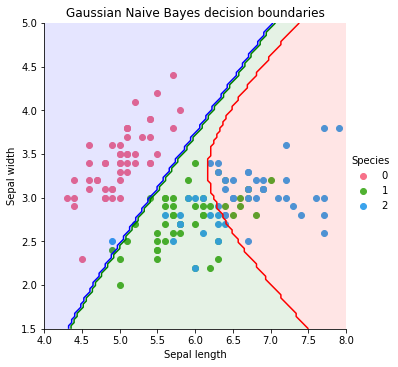

In [148]:
# Our 2-dimensional classifier will be over variables X and Y
N_plot = 100
X_plot = np.linspace(4, 8, N_plot)
Y_plot = np.linspace(1.5, 5, N_plot)
X_plot, Y_plot = np.meshgrid(X_plot, Y_plot)

plot = sns.FacetGrid(data, hue="Species", size=5, palette='husl').map(plt.scatter, "sepal length (cm)","sepal width (cm)", ).add_legend()
my_ax = plot.ax

# Computing the predicted class function for each value on the grid
zz = np.array([gnb_plot.predict([[xx, yy]])[0] for xx, yy in zip(np.ravel(X_plot), np.ravel(Y_plot))])

# Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X_plot.shape)

# Plot the filled and boundary contours
my_ax.contourf(X_plot, Y_plot, Z, 2, alpha=.1, colors=('blue', 'green', 'red'))
my_ax.contour(X_plot, Y_plot, Z, 2, alpha=1, colors=('blue', 'green', 'red'))

# Add axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

<h3>data 3D Plotting using Plotly</h3>

In [149]:
from plotly.express import scatter_3d

scatter_3d(data, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', size="petal width (cm)",
                   color="Species", color_discrete_map={"Joly": "blue", "Bergeron": "violet", "Coderre": "pink"})\
            .show()

<h3 style="color: red">TODO:</h3>
<h3>Implement the Function calculate_accuracy(predicted_y, y) from scratch</h3>

In [150]:
def calculate_accuracy(Y_Pred, Y_True):
    #TODO
    accuracy = 0
    print(accuracy)

<h3>Predict a Single instant: </h3>

In [151]:
# the true value should be 'Iris-setosa'
single_pred = gnb.predict(np.array([[5.1, 3.5, 1.4, 0.2],]))[0]

print(list(mapping.keys())[list(mapping.values()).index(single_pred)])

Iris-setosa
